In [1]:
#Importar bibliotecas
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split
print(torch.__version__)

1.7.1+cu110


In [2]:
#Configurar variáveis
dataset_input = "bin/dataset_input_consolidado_todos_comandos_sem_linhas_erro_e_50_comandos.txt"
dataset_output = "bin/dataset_output_consolidado_todos_comandos_sem_linhas_erro_e_50_comandos.txt"

MSE: 0.00
RMSE: 0.06


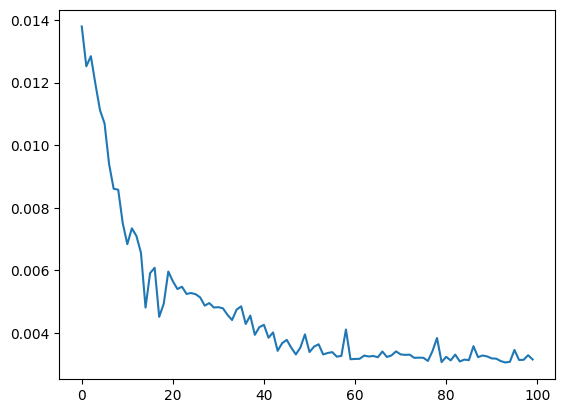

[7757241.302 -363563.136      -2.436       8.533 7757267.039 -363540.223
      -2.394       8.685      -0.003] -> [ 8.691282    0.00094773  0.0322624   8.622851    0.00197271  0.0316968
  8.645795   -0.00421031  0.03993797  8.635903    0.00203282  0.01158202
  8.6324835   0.00746205  0.00780278  8.636266   -0.01028911  0.0069222
  8.624413    0.00577027  0.00597888  8.636649    0.00470718  0.02835889
  8.631962   -0.01124253  0.02227421  8.6231985   0.00166798  0.01686366
  8.63375     0.01534212  0.02597287  8.634499    0.00817214  0.01892758
  8.625862   -0.00579662  0.02778574  8.626856    0.01145294  0.0216725
  8.649312    0.01223331  0.00658671  8.633038   -0.00508229  0.01571035
  8.633189   -0.00432694  0.00975724  8.637997   -0.00015145  0.01661479
  8.638698    0.01047744  0.03009073  8.634072    0.01637786  0.02571611
  8.649082    0.00432654  0.01179413  8.640776    0.000671    0.01372196
  8.647301   -0.01277976  0.01291653  8.63982     0.00303249  0.03349569
  8.638771   

In [16]:
#CONFIGURAR PARA VARIAS SAIDAS
import copy
from sklearn.preprocessing import StandardScaler
import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
 
# Read data
#data = fetch_california_housing()
X = np.loadtxt(dataset_input,dtype='float',delimiter=";",usecols=np.arange(0,9))
y = np.loadtxt(dataset_output,dtype='float',delimiter=";",usecols=np.arange(0,150))
#X, y = data.data, data.target
 
# train-test split for model evaluation
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
 


# Standardizing data
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)
 
# Convert to 2D PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 150)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 150)
 
# Define the model
model = torch.nn.Sequential(
    torch.nn.Linear(9, 2400),
    #torch.nn.ReLU(),
    torch.nn.Linear(2400, 1200),
    #torch.nn.ReLU(),
    torch.nn.Linear(1200, 600),
    #torch.nn.ReLU(),
    torch.nn.Linear(600, 150)
)
 
# loss function and optimizer
loss_fn = torch.nn.MSELoss()  # mean square error
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
 
n_epochs = 100   # number of epochs to run
batch_size = 8  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)
 
# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []
 
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            end = min(start+batch_size, len(X_train))  # Add this line
            X_batch = X_train[start:end]  # Modify this line
            y_batch = y_train[start:end]  # Modify this line
            #X_batch = X_train[start:start+batch_size]
            #y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())
 
# restore model and return best accuracy
model.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()
 
model.eval()
with torch.no_grad():
    # Test out inference with 5 samples
    for i in range(5):
        X_sample = X_test_raw[i: i+1]
        X_sample = scaler.transform(X_sample)
        X_sample = torch.tensor(X_sample, dtype=torch.float32)
        y_pred = model(X_sample)
        print(f"{X_test_raw[i]} -> {y_pred[0].numpy()} (expected {y_test[i].numpy()})")

In [12]:
print(range(1))

range(0, 1)


In [17]:
import numpy as np

values = [[7757819.500, -363524.875, 2.687, 7.901, 7757828.500, -363530.219, 2.569, 7.668, 0.030]]
arr = np.array(values)

print(arr)



np.set_printoptions(suppress=True)

with torch.no_grad():
    # Test out inference with 5 samples
    for i in range(1):
        X_sample = arr[i:i+1]
        print(type(X_sample))
        print(X_sample)
        X_sample = scaler.transform(X_sample)
        print(X_sample)
        X_sample = torch.tensor(X_sample, dtype=torch.float32)
        y_pred = model(X_sample)
        print(f"{X_test_raw[i]} -> {y_pred[0].numpy()} (expected {y_test[i].numpy()})")


[[7757819.5   -363524.875       2.687       7.901 7757828.5   -363530.219
        2.569       7.668       0.03 ]]
<class 'numpy.ndarray'>
[[7757819.5   -363524.875       2.687       7.901 7757828.5   -363530.219
        2.569       7.668       0.03 ]]
[[1.42005795 1.29789503 1.32252006 0.15014253 1.43366659 1.26184555
  1.25993265 0.09551552 0.64087875]]
[7757241.302 -363563.136      -2.436       8.533 7757267.039 -363540.223
      -2.394       8.685      -0.003] -> [7.676292   0.02891351 0.03239961 7.658706   0.02880111 0.03012395
 7.681146   0.02622609 0.03947585 7.6723475  0.02737701 0.01246453
 7.6718597  0.03261744 0.0069226  7.6762547  0.019178   0.0082192
 7.6675158  0.02923611 0.01016352 7.6792912  0.03572161 0.02920748
 7.675805   0.02078435 0.02023919 7.6698055  0.029998   0.02000459
 7.679816   0.03918327 0.0236651  7.6819134  0.03006206 0.0212285
 7.674125   0.02070468 0.0281758  7.6740913  0.03689172 0.02140976
 7.6901717  0.04090744 0.01016334 7.683492   0.01968582 0.0162

In [6]:
np.set_printoptions(suppress=True)

with torch.no_grad():
    # Test out inference with 5 samples
    for i in range(1):
        X_sample = X_test_raw[i: i+1]
        print(type(X_sample))
        print(X_sample)
        X_sample = scaler.transform(X_sample)
        print(X_sample)
        X_sample = torch.tensor(X_sample, dtype=torch.float32)
        y_pred = model(X_sample)
        print(f"{X_test_raw[i]} -> {y_pred[0].numpy()} (expected {y_test[i].numpy()})")



<class 'numpy.ndarray'>
[[7757781.538 -363521.914      -2.797       7.479 7757813.153 -363521.892
        2.827       8.2         0.051]]
[[ 1.33226234  1.31622879 -1.39685001 -0.06478618  1.39973425  1.3065505
   1.37944972  0.38450701  1.04319887]]
[7757781.538 -363521.914      -2.797       7.479 7757813.153 -363521.892
       2.827       8.2         0.051] -> [8.181326   0.05272616 0.02641746 8.140773   0.06074997 0.01603541
 8.129248   0.05398777 0.01440225 8.135523   0.049911   0.01537436
 8.1323805  0.05261231 0.02257932 8.1269865  0.04800221 0.01963068
 8.124198   0.0509049  0.02371841 8.11923    0.05256447 0.01630135
 8.114489   0.04791815 0.01409454 8.113762   0.05891797 0.02015051
 8.111128   0.05003864 0.02361509 8.112732   0.05322156 0.01978908
 8.113821   0.05088584 0.01970432 8.107655   0.05278888 0.02204894
 8.105561   0.05155259 0.01740434 8.103662   0.04708258 0.01973448
 8.100708   0.05222019 0.02272007 8.100998   0.05017047 0.01678706
 8.091274   0.05167418 0.0168583

In [18]:
with torch.no_grad():
    dummy_input = X_test_raw[i: i+1]
    print(dummy_input)
    dummy_input = scaler.transform(dummy_input)
    print(dummy_input)
    dummy_input = torch.tensor(dummy_input, dtype=torch.float32)
    traced_script_module = torch.jit.trace(model, dummy_input)

[[7757241.302 -363563.136      -2.436       8.533 7757267.039 -363540.223
       -2.394       8.685      -0.003]]
[[ 0.03881761  1.10981298 -1.22407144  0.47235186  0.09350635  1.21278579
  -1.20176972  0.64514142 -0.00334679]]


In [19]:
traced_script_module.save("model_clean_maior1.pt")

In [8]:
mean = scaler.mean_
std_dev = scaler.scale_
print(mean)
print(std_dev)

[7757219.02030919 -363790.45257479       0.02507255       7.59847813
 7757221.91891166 -363789.01252881       0.02444362       7.47429562
      -0.00269055]
[419.98896269 203.30314877   2.00996865   1.96946407 420.14477201
 203.81701318   2.01436103   1.86837855   0.05217095]


In [20]:
#maior1
mean = scaler.mean_
std_dev = scaler.scale_
print(mean)
print(std_dev)

[7757225.05264482 -363788.90212366       0.02647504       7.60650176
 7757227.86445566 -363787.52767805       0.02886931       7.49126291
      -0.00282856]
[418.6078148  203.42717893   2.01170859   1.96145779 418.95064762
 203.91455788   2.0160845    1.85034947   0.0512243 ]


In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_test_cpp = np.array([7757481.724, -363634.012, 2.313, 8.372, 7757506.813, -363650.764, 2.799, 7.703, -0.037])
X_test_cpp = scaler.transform(X_test_cpp)
print(X_test_cpp)

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [19]:
print(torch.randn(1, 9))

tensor([[ 0.0573,  1.5971, -0.0614, -0.1519,  2.0956,  0.6641,  0.5896, -0.4267,
          1.4114]])


In [35]:
model.eval()

Sequential(
  (0): Linear(in_features=9, out_features=24, bias=True)
  (1): Linear(in_features=24, out_features=12, bias=True)
  (2): Linear(in_features=12, out_features=6, bias=True)
  (3): Linear(in_features=6, out_features=150, bias=True)
)

In [23]:
# Assuming that you have a trained model 'model'
#dummy_input = torch.randn(1, 9)  # Adjust as necessary
dummy_input = X_test_raw[i: i+1]
dummy_input = scaler.transform(dummy_input)
dummy_input = torch.tensor(dummy_input, dtype=torch.float32)
print(dummy_input)
torch.onnx.export(model, dummy_input, "model.onnx")


tensor([[ 0.2144,  1.4291, -1.2174, -0.6024,  0.2654,  1.4626,  1.5191, -0.3682,
          1.2702]])


In [2]:
import torch
torch.ones(1, 9, dtype=torch.float32)

/mnt/Dados/caiopinho/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [28]:
import torch
import torchvision
import onnx

# Load the ONNX model
model = onnx.load("model.onnx")

# Convert the model to Torch Script
script_module = torch.jit.trace(model, dummy_input)

# Save the Torch Script module
script_module.save("model.pt")

TypeError: _create_function_from_trace(): incompatible function arguments. The following argument types are supported:
    1. (arg0: str, arg1: function, arg2: tuple, arg3: function, arg4: bool, arg5: bool) -> torch._C.ScriptFunction

Invoked with: '__torch__.onnx.onnx_ml_pb2.ModelProto', ir_version: 6
opset_import {
  version: 9
}
producer_name: "pytorch"
producer_version: "1.7"
graph {
  node {
    input: "input.1"
    input: "0.weight"
    input: "0.bias"
    output: "9"
    name: "Gemm_0"
    op_type: "Gemm"
    attribute {
      name: "alpha"
      type: FLOAT
      f: 1
    }
    attribute {
      name: "beta"
      type: FLOAT
      f: 1
    }
    attribute {
      name: "transB"
      type: INT
      i: 1
    }
  }
  node {
    input: "9"
    input: "1.weight"
    input: "1.bias"
    output: "10"
    name: "Gemm_1"
    op_type: "Gemm"
    attribute {
      name: "alpha"
      type: FLOAT
      f: 1
    }
    attribute {
      name: "beta"
      type: FLOAT
      f: 1
    }
    attribute {
      name: "transB"
      type: INT
      i: 1
    }
  }
  node {
    input: "10"
    input: "2.weight"
    input: "2.bias"
    output: "11"
    name: "Gemm_2"
    op_type: "Gemm"
    attribute {
      name: "alpha"
      type: FLOAT
      f: 1
    }
    attribute {
      name: "beta"
      type: FLOAT
      f: 1
    }
    attribute {
      name: "transB"
      type: INT
      i: 1
    }
  }
  node {
    input: "11"
    input: "3.weight"
    input: "3.bias"
    output: "12"
    name: "Gemm_3"
    op_type: "Gemm"
    attribute {
      name: "alpha"
      type: FLOAT
      f: 1
    }
    attribute {
      name: "beta"
      type: FLOAT
      f: 1
    }
    attribute {
      name: "transB"
      type: INT
      i: 1
    }
  }
  name: "torch-jit-export"
  initializer {
    dims: 24
    data_type: 1
    name: "0.bias"
    raw_data: "\"\037\361>3t\362>\203u\311>,\371\342>[\365}\276\323\310\227>\344i\350\276\243\331\272\276F\032x\276\236V\373>\306P\362\276&\363 >[\373\267>\216\213\324\276\204\010\222\276\024w\353>y\026\223\276y\322\n\277*+\t\277Fnh>\267\250\330\276\272\361\034?G\002\217>0w\275\276"
  }
  initializer {
    dims: 24
    dims: 9
    data_type: 1
    name: "0.weight"
    raw_data: "\356R\027\276\213c1\276\017dU\276\3406U\276\366\347\307=X\267C<\370P\013\276$\0138\276\351\265\"\276\217\236\030>\0361\213=\317\3456\276\034\022\331=vM5\275\010\346\353=\252\237\311<\310\0048\273i1\203>S>`\276\374`\226\276\202\261\245=\005\027\214\276\327\300\253\275\203~\313\275\'0Q=\337\323w>\232\275@>/\023\202>\357\311u\274M>]>$*C\275\2450\223\276z\344J\275+\351\205=\204\313\004\276\366\223\371\274\322\215h\276\212|\223>\365G\301=\271\014g=\205P\036>t\356\272=\221\032\344\275\205\274\210\276V`\353=\312Z\267\275Y\005\217>4U\360=\236\037\321\275[\337\231<\307J\245\276\375\271\232\274o\204$=\323\245\204>\\\305r\276K\213\367=\013\247\202\276-\377\255\276\262\366\211=(^i>Eu]\276@\347O>\036%\260\275\033\356Q>\217\201\334\275\214\237\035>x\030?>c\025\230>\252]\265;\330,\345\275\202\263G\276\024\202\206><\315Y\2760\372\212>^\264\230\276\336\343\345:\356\214X\276\372\230}>w\006J\276O\035\013>\341\220\274;\2622r\276\375M\232>\203S\341=\244\260\037\276B\360d>?N\361=\000FO>\014)\324>i!\275\275XM\'>\301\374\277\274\216\022i>\0241\336\274\000\353\020>\022%\025>\301\352\217\274\253\200\205\276\242\243\266><.\274=\310\365<=Y\2443\276\310\017\360=\312\357\204\276\036S\211>\237;\207=\363Z\313=\303\217\355=\371v\220=e\332\203>\321\002l>Q]\332\273\325\227\002\276\300\3725=|R\'>x\277\326\275m\036\272\275\225\325\232\275\024\234\212\276\254\t\367;\302\351\214\276\367\200E\276\002t\332=\207\363z\276C7\321\276Ht\000;b\rg>\225Q$=\261\315\n\276>\004J\276\241\315K>\356F \276\207\n\323>\005k\023\275\356\024t\276RB\277=\037pp<\004\210A\275\300m\200\275\021\2229>>[d=\374z\323=\021\232\226\275\023\263\220\2759\371\221\276\353m\202\276HL?\276F\230s>~1\035\2769+\000>\336\022\223>\010\017\330\276\004s-\276\235\2522>.\222\355=\220[\257=\362e\313\276\274\366\314<)\345\354=\255\000\231>]\322(\276\205K\233\276\205\027\253=\224\351\312\275:\321D>\254~Q\275+\321u\276\016\377\021\276@\352o\275\275\330?>7)c>7H\230\275\353\346M\276\025\222)=\371\315w\276p\327V\276V \r=j\030B\275g\216\232>:Z\307=y\314\200\275\025\274\360\275\362-;\275s\303\221\276\261\224\344\275\321Uu\275\274\"\376<;\021\204\276\346i\253\273\r\275[=[\026\314\275gm\237\273\257\317X>\263\374\203>s\005+>?\240\225\276\013\312\215>\025-\275=!\331w\275\031C\014=\r\372\344\275}\374?\276\346\240\216\276\226\361\000=I\310\316\276\271-\020>I\251\366\275\005\361\203\276.\243\251>\375\027\003\274\273\237\001>&\246\001\274\331\327|\274\334\362\033\276\360\234\323\276\034\317\305\275"
  }
  initializer {
    dims: 12
    data_type: 1
    name: "1.bias"
    raw_data: "\t\021\325\2765\343 \276\201=\323\276E\266\237\276\230\317\263\276\002\t\322\276\245\372$\276pd\230\276\307\267\257= \342\241\276\227\363\302\276\n\321\303\276"
  }
  initializer {
    dims: 12
    dims: 24
    data_type: 1
    name: "1.weight"
    raw_data: "\250?\037\276\020S\225\276!>?\276\313\320\016\276\345\315\234>\331l\013\276\277L&>tb\201>2[\031>RT\312\276\323\r\034>\220\035\002\276\315=\217\276\254\232\227>\241\363$>%\203\265\276\262\014\221>\214\272\367<\3677\366=KC\020\276t\365\235\275\246\326+\276\022\341\251\276\037\031\323>\373\020\177\276\312\227Q\276Ku\363\275\371l\255\275\r\364y>R\256>\2766\373\317>\014\033\311>\203\311\241<\027q\031\276z2\247>\367\312\346\275\377\262\324\276\334\037\302=\035\345\025>\322r|\276\353\003\220\275\243\273\264>\254\347\002>\335\254\214=|\356\253>mm\265\276\245\252j\276#M_>yU\252\275\334\205d\276\036s\225\276\255\212\314\275\254\222\014>\256\363\323\275\346\302$> \372@>\222BP>\267\205\243\276\024\002\217=V F\275\230\016\031<.+\370=^\310\276;\034I\320\274\201\340\250>\222\024\254<\\\t6>m\250\203\276\340B_>/\277\215\276\325\311\210\276m\226s=77\031\275\023\3351\275\026ia\276\304\247\221\276\222=\353=\241h\216=9aB=\335<;<{w\321;\032NQ\276\202\352\006=bU\215\2751\211\247\276:* >n\023 =\233qt\276\211;\231\274\212\024\220>\343\247R>_A|\276\t\315\024>D\207\253\274\321b\224\276\022t\266>\372\2539\276\263\260{\276\315\242\207\275f\324\034\276A\252\225=12\023\275g\351\310>\341(\334=\242tg\275{\016K\276O^B>\010H\260\275mc\234\276y\373O>\214\3437>c\374q\276\254\370h>h\352\212=^\310\036=\214\315\276\275\020R\264>D\236\303\275\351\304\332\275\025\277\254>D\241\236\276^r\251\276\375o\231<|j\352\275y\271\257\275\222\031\024\276$\t\016=v\271\246>\030\205J\273N\017\\\276:\217\217>#v\032\276\257dB\2765{\206<T\337\364\275\022R=\275\275M*=\263\025\214>!&\207>\317\211\200\276\304\314\236:\206<\"\276f\362\227\276\210cQ>B\372\'\276L\013d\276(K\364\275\361C\372\275\234\364\367=\273w\243\275\303\350S>\207\226\234>\276Z\314=\356l\261\275\226%\325>~\020.>\373\260\303\276\257\273\206>\344\223\r=M\247[\276\032\237\233>\276@\217<P\212\216>\026\267t\275\200:\261>\367\311}\276\243\322/\275\377 ?>\274\377+\276|\'\205\276\372\337c\2756\202\370\276\302\377~\275;\261]\276\024\302\326=!\001\036>\274\221S>*\346\256\274\\=\203>\227\021\014=>\217\027\275\227\361\307>#\305\032>\340v\230\276\360\250\232\275\303b\313>nv\251>\010tZ\274\223\\\246=\276\314\301\2762\247\204=*\376];\343\364m>\327Bj>\256Sn>\370\346\256>\3337\340\2753M\364\272\232\022\346\275J\276\276\275\252\237\006\276\255\220\353=\013\270\017\276\035\022S>\274\210Q>\342>)\276\345OS\276\376\007M=\240\212e<O\323)\276\202(\277\276\371\261v>\374!\244\276\355}\263>\\\365\022>\240\330D\276\216\177+\275\257=\005\276\260\222\333\275\353\356\232\276I\212L>\271c\255=&19><\240;=\330oh>\3216_\276A\202\262>\037\351s\274\2624\231=X\241\367=\367\232\233\272\256\357\004\276\037n/>\020\375\252> \273\355=\233\275\000\275Q\360m>o\030/\274K\200\271<\376lp>\2528\325<:\273\271\274k\346|\275\231A\261\275\324\'6\275\014\330?\2743\235\250<\246\213\265>\035-Q>?\364\252\276-\257\215>]CI\275\220\005\t\276qv\356<\\\337d>\262\316D\276\177\277\205>\035o\203>\342<\271>{\303\212=!t;>\300\313E\2766bH\276\035\360\017>\346}*\276\361o\246\276l\355k\276v\323\252\276\024\230\304=\263\"P\276\004\370]>v\357\263<\253v\"\276\315N\332\275\372\037\211>\017\222\340;A\031>\275\265tt\275\237uI=\355\203,\276\261\321\232=\202h\237>\266\232\322=\261\325u\276\332Wa>;\003]\276\004\216M=\014\253\243>"
  }
  initializer {
    dims: 6
    data_type: 1
    name: "2.bias"
    raw_data: "\240\240\353>\251\303\313\276N\"\304>\361\216\306\2764\331\237>\271\331X\276"
  }
  initializer {
    dims: 6
    dims: 12
    data_type: 1
    name: "2.weight"
    raw_data: "+\254\230\2763\342\245\273n\245\345\275E\230Q\276\257\262\274\276\243\000\243\276\330qG\276\274%v=Cm\267>\004\177\213\276!\236\277\276k3\267\276L\364\341\273\216L\226>\224<w<0\034=>\356?\332>o\332\376=`]\227;k\333\327>@\337\237\276}\035\226>\265\357\313>\250%\264<$tJ\274`\235\001\277\241b\024\275C\320\215\275\242\001`\276O\324p<\037\034\343\276\003\017k\276N4\211>a\250\316\274g0\266\276\033\206\224\276\313y\247>E\352\351<\243#\343<2\024\265>\210(\210>\245\367c>\201}\224\275\343\316\346>(\032\023\276Ys\205>T\037\367>\261\2531>6\347\002\277\021\217\274\276h\320\000\277\222N\257\275\022\306\326<\226\255Q\276\220\266\036\276\000k\275\275\n2\312>\371a\006\276\322Y \276QN\206=\037\351\277>\234!Y>\322\373\356>\257L\245>\275G\270>\266\\\315>\316Bm>\375b\220>\252\215\212\275\036i\213=\376\026\177>o\234\265>"
  }
  initializer {
    dims: 150
    data_type: 1
    name: "3.bias"
    raw_data: "\355\013]=\277\330\005\276+\264\375<\177]&>\010s+\276j]\263=\265eD>\263J\261\275N\022L=\337\263\352=6\374\364\275\342\300\247\274.\303\231=`\233\242\275U\266\256<\231\177\241=\203\205\227\275sb\315=\331\3402>\213#\027\276\303Q\312=t\214\021=\007]\247\275\325\224\r<t^\246=\024j\010\2760\342\360\274\017M*>|\333j\275\205X\252=\374\271F=\225\025\202\275\370\022\275=:\260A>\2477]\276\240Y\255\273\344^&>\262a\315\275H^O=\032\255g=\360G\007\276\222}6\275m\366\352=\023\001\213\275y\t\203=\321o\332=\016\020/\276\031(\027=?(X>\320\254\r\276a\372p=E\020 >H\303)\275Y\257\310=\264\023{>B\362<\276\234\234\255=\257Y\032>\ng<\2762\nt\275V79>\361\211\013\276gA\271;\'ut>KZ\306\275e\2017<I\237\203>J\350\366\275\337{\203=\3609\017>\235e+\276cQf\275%ol>\341\330-\276\266\236T\274\322\032\037>O\030\304\275}\266\007=\035gy>\377\023\265\275FM\235=\332lz>\315Y\236\275\2630\245=\000\"U>\014\312\321\275&\2543\274z\261c>\024\305\t\276b\377\261<\266)%>\274w\337\274/\341P<\324\262\225>\021-p\275\372\223/<\305\227\221>\215\3316\276\340\013==b\263y>\\~C\276\\\225\356<\010t\213>\253!=\276\212m\230\275F$\232>j1\002\276r\214\021=(8:>\013\363\346\275\235\373\031\272\000\236\225>\0072=\276\014\323\361=}\207\225>\270\250\016\276\262\371\031=IJ\231>\205\366L\276\211\271\342\274\303\300\262>\371\006\010\276\373!\322=VH\234>*}\311\27509G=\247\216o>\345\352[\275\321\267\256\274T)\251>F\340\350\275q\003M\274\210\365g>$\334\236\275\371\306\005\275T\177r>\016D\345\275\345\207)=|^\253>f3\324\275\272\311\024=\321wK>\227d\250\275\321\333B<48\220>\026\204\267\275\371\224\243=\270\217\263>=\210\376\275\326/\244\274"
  }
  initializer {
    dims: 150
    dims: 6
    data_type: 1
    name: "3.weight"
    raw_data: ".\334\216>\320K\004>R\234\327\275\n\366E\276\264t\023?\352\201\334\276\3134\354<\016\315=\276q8\304\276\216xu\276\212\263\326\276\276\213\221\276nao>7\216\224=\023-\325=\226V\250=B\206\030\276:\225)=S\231\314>\241\273.>\334\3376=lv\016=\246{\323>\311\274\010\277\331\267o<\306\272\205\276bq\001\277\311\236\267\276\254\333\236\276\214\302 \276!\2219\276\0247D\276i\347\306\275\255\303\203>\t\261\213=\215\327g\276\314\204\265=%Ug=j\371\010\275\372\273\233=\312\007\005? X7\277\251\261\216>T\013\344\276:\335\010\277s\246\200=\202\035\337\276q\252w\276\350\031\307>\266\371\215=\224\315\021>(EF>\"\346r\276\006JF=\rmE?aN\371=\376\371\016\274\221\003\235\275\010S\233>^\223h\276\3454;\274\314@\\>\3528\216\273c\372\243\276\310l$\277\240\325\340\276\223D\254\276=d\201>S\252\021>\341l\236\276\\\021Z=\2472\250\275N\316\007?5\304\267>\334 8>E\334\262\276\375^\373>~\021\327\275\230[\226>\216\203F\276\260\345\225\276y\351\277<\302\301\027\277\'\034\246\276\001c\354=\322\334\\\276\003\024=\276\273Z\303=\2127\230=\264\303\316=\305\305\315>\332\335\204>e5\201=\225W\303\276\335\336\304>\255!\222\276M\314?>\312\350U\2768)\236\276\232\337\244<\3576\r\277Ti\302\276\222/\"\276\307\271N\276\334\323\260\275f\232\240>\376H6=\200\220\201\276\2325g>D\177\320\275A\211\353\275\272\275\302<\240\177\023?\310\035\353\276\235|\303>\000\372!\276\2751\262\276\001n^\276D\303\010\277\266\336\267\275\225}\252\276]\261\006\276\270\320%\275\334\267x>\314g\231=s1\255\276\214\010\n?\276\350Y>\322\356\204<\2659\006\277^\314\354>\3702|\271)\317\341=\031\320\t\276n\221\204\276\017\240I\275\353\245\014\277\233\027\320\276W)\226\274)\202Y\275\2260\210\275\305\200\005\275\266\001c=o\225*=\267\275\346>D/\310>p\212~>\'\000\345\276\236\222\223> /e\276\034-\242\276\264\241\341=\244V\027\276D$\327\276\035\265\340\276\207\n\373\276\034\336\237\275\200\001\277\273\003\035\251\275\242\330O\276\277\177\350=\351\334\365=0\207\237>\034>\242=\304\332\365=\376\242\234\275\314\257\n?\343\372\224\276\335\345\204\274\2178\027\276\317\351}\276\016\315Q<A\273\007\277v\304\006\277\377ws<_}\031\275\'\032g=\t\266\177>\207K\262\275\247\3343\276#\341\342>\035*\361=\244i3\275O\257\014\277\013\351\242>\265\201\026\276\373\325\034\276\"\001\300\276\303x\364\2762\266\224<>\324\255\276k\202\000\277-\366B\276\362!\241\276\262\363P\276)\033\235>A[\010>\236AX\276\346\226\250>@8\335\275\305w\303;\014\205\270<\362\004\006?\"\007\240\276\2114\372>\232\245d>\032W\256\275y\314\014\277\330v,\277\357M}=m\304\255\275\3204\241>YQz>T)Q\276\036\366\322\275\034\344.\2751\360\241>\360\370F\2768S\013\276\201P\315\275\001\307\306>O\344\301\276\000yb=\274qe\275<\340^\276\230\010\035\276\256^\t\277\213\210\307\276\021\t{=\361\212\034\276\336\000\272\275\360%1>\260JI<$\274\336\274\353<\r>\221-\216\276Gl\255\276\314X\005\277\017\276I?Q\231k<\376\361f\275\206\310\356\275\r$\250\276\376\037\221\276\330\303\320\276\203\007\245\276=aL\276\n\t\007\276\021kl\276C\020\203\276@\325\202>}5\032>\317,r>\256g\255>e\237\236>:\020\370\276\231-,>\213\262\301\276h\212\333=\272\0258\276P\"\217\276\021\263\205<\215/\t\277\376\213\334\276\307t\242=A\222\223\276\327\322F\276\325\271\207>t\346t=\326\212\301\274.\306\002?\3471\314\274\013\323(\274G\221\276\276c\260.>\226\'S\276Y2:>]\000\020\276U\322\303\276\004\304\267\276F\261\326\276Z\334\310\275\325x\234=\310\016\306=\370(\365=\265Sf=\262\352\343\275\022\226?\275\253\310\246>\305|\214>nF\354> v\316\275\253*\'>\177A\337\276\275,B=_\030\014\276\231\317\260\276\224\330\213\276\202\310\327\276G\024\201\276\372fF\275w!\220=l\376\352=\356\017\346=ik\253\275{? \276\362\014X>\333n@>\316C\236>\273\310\250\276\376\002\245>\371_\221\276\025\230\210=\332\232\016\276\277NU\276\364\263\277=0\260\024\277\216\330\010\277n~[\275C\273@\276:\222\211\275{X\250>Nh\3127\032wT\276FT\353>\177{\224\276\230%\243:@\256!>\363\304\024>\373\240\356\276\323\361z>\341\231^\274_\324\216\276\341\020\333\276$*\372\276]\260~\275(L\224\275\014\377\256\275\363\004\324;\023\370{>Im\355\274\016\236O\276J\361\246>\300\255\203\276\233\326\233\275t\351w\276\350\267\337>f\263\001\276\024\341_>\232\025\314\275\033\351\267\276+\030\321\276\243\236\333\276R\300K\275\316\220\232\276+\203\252=\233\344\204\275\274(\314\276\013&K>\212`\305=(\362\223=\226\373\254\275\021\236\014>\272;\177\276\343\342\365>\235Y\207\276&,\350\274\271\262\233\274\326\341v\276Gb\242\2760\201\351\276~3\242\2763%\010\275(\272\375;\326\220\206\274 R\204\275)\314\002=\2255\350<\344i\215<vE\000\276S\351-> V\216\275Wp\224>\221d\n\277\203\244\321\274\346\240\026\276@\244\232\276\376\353\010\276\213v\344\276\342\357\313\276Q5~>\007\326\374\275\022\331\320\275\022\305\210=\022\261I\274\214m$>\312\242(\276\327f\231\275\344\322\203>\365.\220\275\316G\277>\272\257\030\277\222-/>\375l\034=C#\027\276\204rd\276\306\366\025\277\023\350\226\276\036#4=d.\321\275c\260\333\274\317\314Q>d\373\000\275\301v\266\275\241\t\010?-\374\201\276\330\361\037\275J\216\247\276\025\342\000>\017\001\326\2751\356\276>\324\262!>\212\233\256\275B\350\301\276\333\035\'\277\377\337\316\275D\263\240=L\216\226=\246a\007\275\240U\221\276\311XT=Q\007y>\346\325\231>\261[i\276\013\314\036>F84\275\006\350\223>\223\254\203\276\024Q\002\276\025tc\274v\327\225\276\320\376\357\276E_\270\276\327\327\200\276\007~\205=hr\301\274\272\027~\275u\324\312\275\007\274)=&\366\007>o0\204>\255\354s\276Q\264\004<9\376\301\276E\373=>\203;b\276F\r\303<\312\":=\241\364\363\275L\317.\276\272\013\021\277\036Q\332\276\275\271\256=z\222=>\330\327H>\2779\242<\377\003\"\276\263\\c\275\010N\235<\275\007X\276\2667\">\016\r\t\276\214\032\016>\352\242\014\277[ \205\276\035\331\263\275{\306\203\276|\3337\276?\350\311\276\257I\007\277\357\337\024\276\316Tt\275\213qC<f\230B>\357\253\030\273\320/\\\276S\303\257>y\352\347\276ia\025<\330\356\214<\375i\210>\014\023i\276\375\252\245\275\343\333\272\2758ii\276\315\353\272\275~\325\363\276\261\205\370\276\232.\002>\343;\373;\302\255\326=\333\263\203>\216K\033\2764\004\n\276\355\'\254\275\222\025\274\274r\363\244>\275\247\275\276\366\035N>\357\267\326\276\355\302\240>B9Y\276\277u\254\276t}I\275\227\307\003\277\005,X\276\307\304\214>\222\263\324=:r\236=\363d\223\275\330t\352\275\n%5>l\315\\\276\275\252\252\275A\253\243>{\243\253\276\323\355\315>\031\007\266\276f4\201>\242\312\036>\363\277V\275\016z\223\276\024F%\277\303\347s\276\236+N=\257l\333<\361a\002=\211=L<\261a\031\275\270\265\370;\373\365\021>,P\226\275\2357\214>2\361\000\277@U|>B\n\272\275\301\274;>J\251\223\276\311\343\237\276\320\337^>c\223\t\277}\327\356\276B(\233<\236y\201\274\247\245\273\274\r-\220\274l\211Y<v\315\n=\245\027\253>\217\356\313\276\234\221E>bY\325=#\254\343=\334)\244\276\213\365~>\214\320\334\276\001M\366\276[M!>\362@\333\276\264\025\233\276\376\220j\273\033\325\317>\336\\\267>\254B\030\276\344\257X\276\331k\252\275\026\226\030\275\036\263\000\276\347\214\312>\357\237\001\276\002\326q;\326\373\025\277:\373\353;\323?A\276*\201\347\276\334(\327\276\022x\217\276\317z\330\275\350\336\036\276,%\003\275<\275\350\273\305\355\205=\2621\022=\342r\010\276\207^\360>\335}^\275\350 \000?\223n)\276\354\322/;\035\354\330\275\261m\302\275\374P\277\274\243\343\247\276.\027\n\2775\210\237\276~2\034\276f\276\273\275\226\312.\276\321\335\033\276\023Jj=z\275\356=\207I\226\274n\030\271=H\002\216\276\213*\234>KE\367\275p+\022>\022\364\250\276\336F\016>\021\374\035\275US\237\276d\225\347\276\361z\314\276^\373\213\275\n\356f>\231\204a=\255:}\275\350\264\235\276<\261\016=6\314\271>\357\370\231=hH\024\277\227;\306=]\332c=(\324\246>\353K\211\276\267\254\005>\240\003r\276\257\311\321\276%\331<\276\263\367\272\276E\3669\276mK6=\324\342j\27659<\2768\301\010>\207\311\260=\034H\006=IM\205\274g.\031\276o\001\260>v\246\n\277\031Z\300>\006c\251<$d\032>\335!m\275\267\023g\276\303p5\276\3426\000\2771q\211\276\233Y\037>\265\227i\275\316Q\210\275y\277\242\274\033\244\251;\255\033\020>Q\233\203>\225\335\222\276\201h\307>\307#j\275\340w9<3q\211\276\020_\013>\330\010\226\275\230\351\257\276\177Q\344\276[\240\275\276^1T\275\221#N\276\307}%\275\317[\251=\260\322\245>\276\314n\275\367w\274\276Q\252A=\223\005\350\276\001|p>\337c\252\275\224T4>\030\306\223\276\212\277\356>\370\311\246\276\256\353\364\276M\347\367\275\0212\326\2763|\274<\352m!\276\312Y2\275\000\370\365\274\200q\023=\013\251i=5-\327\275f\314\236>m\t\353\276,(\234>e\230\033<\017\367=>\'b\227\275\351\210\007>\363QZ\275\024\016\262\276Y\374\002\277\016\n\263\276qX\325\273\364\324\002>\304\364{>\2679.>\243pY\276\r\337\341\275\322\311\004>\272t\035\276\0201\231\276\375Z\361>pk\371\272\332\004G=\026\016\r\277Y\243Q\275\201\2701=\245\2579\276\351*\254\276x\032\341\276e=\236\276\020\2715\275\235\267\240\274\013\331\301=1d\232>\300/\330\275\027\316\206\276l\344\027\276\366\033\256\276\367\370\274>%\307;\276E\306\231<\313\271\364\276Vb\304\276C\002\213<z~@\276)\031\223\276\210h\263\276f.\n\277\014\342\034>\222L\371\2751\376f\275Q^9>\372L\031\275\245\317\373;X\034M>\303\233\370\276\250\3373>~\202\257\276/\374\316<\267\212\311\275\260\217/\276\252g\330\276\233\242\001\277\035\233f=\243\250}\276\263\027\354\276^\026\327\273\014\266\306\275dn\027\2763\276\003\276c\335\375=w\242\030>\365\263\325>\263\244\035\276\367D0?f\030\211\274>\265^\276`\251W\276\375\210\312>\242\233\324\275\025\274|\276<e\344\275\356\035\013\2779\\\004\276L\351&\276\204\254Z\274I\326\226\275\247*$\276\311q\374=\366\327\025=\247\321\261>\363\266\347\276\014\332\231>2\270\257\276\207\262\201>j\316\214>X\347\260>\001Ug=\340\t]\275a\034\023\275\357v+\277\252d\231\276\350,\023\274\240\002\362=\345\266\006=\227#m\276\371?\271<\035\363\376=\352\316J>\265\320\301\276\002\313\251>\307\300\324\276h8`\275\323x\206\275\342\225\264>oX\215\276\301\274\317\276\213)\217\275L\234\330\276;\201\304\275\033\000\003\275\027!t<\211`\'=\270\202\211=\3335\373\274y\277\247\275Y\311^\276\222\211\017\277\'j\232>\020\204\346\275\322\200\023>\362\202\300\276,Ey\275kZ5\276\316\265\257\276\331\'3\276\202&\254\2763W\243\276\352\221\326=\277W\336\275`\337\207\275rV\363=\205`\313\273\312\021\263<i\372A\274c)\321\276\371\023\217>\204m!\277`\237%>t\211\234=\226}v>\275Q\227\276\247\206\310\276fcy<X\023\320\276\226k]\276Q\332\201\276<da\275\261\343\257\275;#\247\275\245\214\021>\202\304\200\275\023Y\202\273m_\274\276\261\250\363>\226\034\253\276P\242\371=\256\251^\275\311 4\276MU\227\276]]\342\276\314\307\370\275\333:r\276\373\035\273\276\346\246i\274T\236\014=n\373\352=\267\304V>o\301\342\2755\201I\276\356\274l>Z\312/\277\250v\214>\\\277\320<)\362&\276\266\n\213\276I\177\272>\347\254\207\276 &\322\276\302\256\365\275\251\303\305\276\243k\375\274xO\026\274J\354\237=\330\022e<W\2451\276i\256\312<\320\227\306="
  }
  input {
    name: "input.1"
    type {
      tensor_type {
        elem_type: 1
        shape {
          dim {
            dim_value: 1
          }
          dim {
            dim_value: 9
          }
        }
      }
    }
  }
  output {
    name: "12"
    type {
      tensor_type {
        elem_type: 1
        shape {
          dim {
            dim_value: 1
          }
          dim {
            dim_value: 150
          }
        }
      }
    }
  }
}
, (tensor([[ 0.2144,  1.4291, -1.2174, -0.6024,  0.2654,  1.4626,  1.5191, -0.3682,
          1.2702]]),), <function _create_interpreter_name_lookup_fn.<locals>._get_interpreter_name_for_var at 0x7f17e83d9af0>, True, False

In [18]:
X_sample2 = X_test_raw[0: 1]
print(X_sample2)

X_sample2 = scaler.transform(X_sample2)
print(X_sample2)
X_sample2 = X_test_raw[0]
print(X_sample2)

[[7757706.153 -363881.716      -2.482       8.499 7757721.272 -363870.038
       -2.487       4.803       0.001]]
[[ 1.16240348 -0.45512402 -1.25481378  0.4579256   1.19118628 -0.4031037
  -1.25742504 -1.43256721  0.07519625]]
[7757706.153 -363881.716      -2.482       8.499 7757721.272 -363870.038
      -2.487       4.803       0.001]


In [14]:
model.eval()
np.set_printoptions(suppress=True)
with torch.no_grad():
    # Test out inference with 5 samples
    for i in range(5):
        X_sample = X_test_raw[i: i+1]
        X_sample = scaler.transform(X_sample)
        X_sample = torch.tensor(X_sample, dtype=torch.float32)
        y_pred = model(X_sample)
        print(f"{X_test_raw[i]} -> {y_pred[0].numpy()} (expected {y_test[i].numpy()})")


[7757706.153 -363881.716      -2.482       8.499 7757721.272 -363870.038
      -2.487       4.803       0.001] -> [ 4.8010063  -0.00074159  0.01997822  4.8005514  -0.00091523  0.02000268
  4.814805   -0.00176182  0.01970529  4.8287263  -0.000778    0.02051836
  4.8326116  -0.00174367  0.01992373  4.856453   -0.00167146  0.01983681
  4.864167   -0.00193731  0.01993301  4.879089   -0.00164818  0.02014743
  4.8937235  -0.00073487  0.02012613  4.8967085  -0.00159477  0.01993886
  4.9280586  -0.00181691  0.01975316  4.925619   -0.00195716  0.02010386
  4.950785   -0.00190242  0.02001777  4.957052   -0.00186971  0.0202428
  4.97818    -0.00249793  0.01988537  4.995721   -0.00255796  0.02014657
  4.994455   -0.0025937   0.01995826  5.008133   -0.00280979  0.02011759
  5.0308924  -0.00291541  0.01984772  5.0377316  -0.00323275  0.02050596
  5.0456805  -0.00307235  0.0199565   5.065904   -0.00340613  0.01975301
  5.074639   -0.00332363  0.01996499  5.1010294  -0.00328155  0.01999776
  5.1006637

MSE: 0.00
RMSE: 0.02


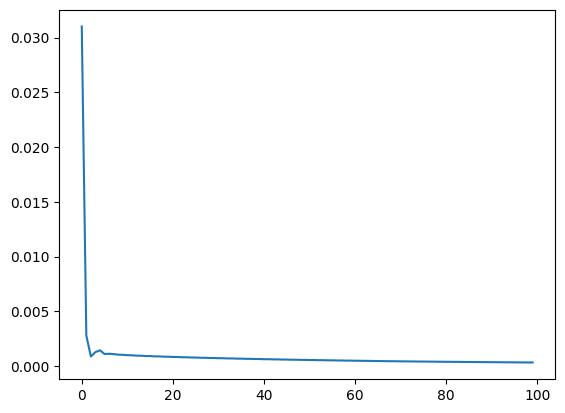

[ 7.75696163e+06 -3.64057635e+05 -1.38000000e-01  8.54600000e+00
  7.75692823e+06 -3.64053126e+05 -1.32000000e-01  8.49100000e+00
 -2.00000000e-03] -> [ 8.4910440e+00 -2.1275878e-03  2.0009704e-02] (expected [ 8.491e+00 -2.000e-03  2.000e-02])
[ 7.75720516e+06 -3.63589039e+05 -2.53100000e+00  8.55000000e+00
  7.75723371e+06 -3.63569516e+05 -2.49900000e+00  8.66100000e+00
 -6.00000000e-03] -> [ 8.6609583e+00 -6.1482787e-03  2.0036645e-02] (expected [ 8.661e+00 -6.000e-03  2.000e-02])
[ 7.75717733e+06 -3.63615552e+05  1.04800000e+00  4.16700000e+00
  7.75716855e+06 -3.63636256e+05  1.09200000e+00  5.54400000e+00
  6.30000000e-02] -> [5.5442753  0.06288677 0.02018113] (expected [5.544 0.063 0.02 ])
[ 7.75719467e+06 -3.63595825e+05 -2.57200000e+00  8.52500000e+00
  7.75722353e+06 -3.63576869e+05 -2.54100000e+00  8.66100000e+00
 -6.00000000e-03] -> [ 8.6609735e+00 -6.1470866e-03  2.0041056e-02] (expected [ 8.661e+00 -6.000e-03  2.000e-02])
[ 7.75663871e+06 -3.63686725e+05 -2.46600000e+00  8

In [18]:
#FUNCIONOU COM 3 SAIDAS
import copy
from sklearn.preprocessing import StandardScaler
import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
 
# Read data
#data = fetch_california_housing()
X = np.loadtxt(dataset_input,dtype='float',delimiter=";",usecols=np.arange(0,9))
y = np.loadtxt(dataset_output,dtype='float',delimiter=";",usecols=np.arange(0,3))
#X, y = data.data, data.target
 
# train-test split for model evaluation
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
 


# Standardizing data
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)
 
# Convert to 2D PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 3)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 3)
 
# Define the model
model = torch.nn.Sequential(
    torch.nn.Linear(9, 24),
    #torch.nn.ReLU(),
    torch.nn.Linear(24, 12),
    #torch.nn.ReLU(),
    torch.nn.Linear(12, 6),
    #torch.nn.ReLU(),
    torch.nn.Linear(6, 3)
)
 
# loss function and optimizer
loss_fn = torch.nn.MSELoss()  # mean square error
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
 
n_epochs = 100   # number of epochs to run
batch_size = 8  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)
 
# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []
 
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            end = min(start+batch_size, len(X_train))  # Add this line
            X_batch = X_train[start:end]  # Modify this line
            y_batch = y_train[start:end]  # Modify this line
            #X_batch = X_train[start:start+batch_size]
            #y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())
 
# restore model and return best accuracy
model.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()
 
model.eval()
with torch.no_grad():
    # Test out inference with 5 samples
    for i in range(5):
        X_sample = X_test_raw[i: i+1]
        X_sample = scaler.transform(X_sample)
        X_sample = torch.tensor(X_sample, dtype=torch.float32)
        y_pred = model(X_sample)
        print(f"{X_test_raw[i]} -> {y_pred[0].numpy()} (expected {y_test[i].numpy()})")

MSE: 0.00
RMSE: 0.01


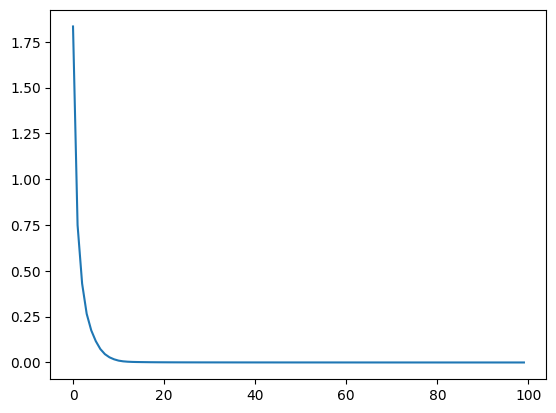

[ 7.75655038e+06 -3.63917271e+05 -2.31000000e-01  5.70200000e+00
  7.75653753e+06 -3.63908823e+05 -8.46000000e-01  4.40600000e+00
  7.50000000e-02] -> [4.3999896] (expected [4.406])
[ 7.75766160e+06 -3.63610685e+05 -2.50900000e+00  8.55000000e+00
  7.75768651e+06 -3.63592380e+05 -2.50700000e+00  7.70300000e+00
 -2.00000000e-03] -> [7.704249] (expected [7.703])
[ 7.75754790e+06 -3.63656925e+05 -3.13600000e+00  8.55000000e+00
  7.75757851e+06 -3.63654357e+05 -2.96700000e+00  7.70300000e+00
 -1.50000000e-02] -> [7.705766] (expected [7.703])
[ 7.75769361e+06 -3.63590014e+05  6.39000000e-01  8.55000000e+00
  7.75766713e+06 -3.63610291e+05  6.52000000e-01  8.52900000e+00
  3.00000000e-03] -> [8.52703] (expected [8.529])
[ 7.75685868e+06 -3.64044085e+05 -1.26000000e-01  8.55000000e+00
  7.75682885e+06 -3.64038885e+05 -1.75000000e-01  7.65400000e+00
  1.00000000e-03] -> [7.647367] (expected [7.654])


In [ ]:
#FUNCIONOU (uma saida)
import copy
from sklearn.preprocessing import StandardScaler
import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
 
# Read data
#data = fetch_california_housing()
X = np.loadtxt(dataset_input,dtype='float',delimiter=";",usecols=np.arange(0,9))
y = np.loadtxt(dataset_output,dtype='float',delimiter=";",usecols=np.arange(0,1))
#X, y = data.data, data.target
 
# train-test split for model evaluation
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
 


# Standardizing data
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)
 
# Convert to 2D PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)
 
# Define the model
model = torch.nn.Sequential(
    torch.nn.Linear(9, 24),
    torch.nn.ReLU(),
    torch.nn.Linear(24, 12),
    torch.nn.ReLU(),
    torch.nn.Linear(12, 6),
    torch.nn.ReLU(),
    torch.nn.Linear(6, 1)
)
 
# loss function and optimizer
loss_fn = torch.nn.MSELoss()  # mean square error
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
 
n_epochs = 100   # number of epochs to run
batch_size = 8  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)
 
# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []
 
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())
 
# restore model and return best accuracy
model.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()
 
model.eval()
with torch.no_grad():
    # Test out inference with 5 samples
    for i in range(5):
        X_sample = X_test_raw[i: i+1]
        X_sample = scaler.transform(X_sample)
        X_sample = torch.tensor(X_sample, dtype=torch.float32)
        y_pred = model(X_sample)
        print(f"{X_test_raw[i]} -> {y_pred[0].numpy()} (expected {y_test[i].numpy()})")

#Criando o modelo 
l0 = tf.keras.layers.Dense(units = 9, input_shape = [9])
l1 = tf.keras.layers.Dense(units = 64)
l2 = tf.keras.layers.Dense(units = 64)
#l3 = tf.keras.layers.Dense(units = 93)
l3 = tf.keras.layers.Dense(units = 3)

"""Modelo inicial: 
l0 = tf.keras.layers.Dense(units = 4, input_shape = [4])
l1 = tf.keras.layers.Dense(units = 64)
l2 = tf.keras.layers.Dense(units = 128)
l3 = tf.keras.layers.Dense(units = 3) """

model = tf.keras.Sequential([l0,l1,l2,l3])

#Compilando o modelo
model.compile(loss='mean_squared_error', optimizer=optimizers.RMSprop(lr=1e-4))#tf.keras.optimizers.Adam(0.1)), loss='mean_squared_error'

#Treinar o modelo
history = model.fit(inputMatrix,outputMatrix,epochs=500,verbose=False)#epochs inicial=500
print("Finished training the model!")